# The_Donald subreddit Nov 2016 vs Nov 2017

A comparrison of the subreddit dedicated to the Donald in the month of the American election vs one year later. 

In [124]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from matplotlib.colors import ListedColormap

sns.set()

In [55]:
data16.shape

(109714, 19)

In [57]:
data17.shape

(23341, 19)

In [2]:
analyser = SentimentIntensityAnalyzer() #http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf

In [3]:
data16 = pd.read_csv(r"D:\Data_sets\Reddit\The_Donald_nov16.csv")
data17 = pd.read_csv(r"D:\Data_sets\Reddit\The_Donald_nov17.csv")

Data available on Google bigquery: https://bigquery.cloud.google.com/dataset/fh-bigquery:reddit_comments

In [4]:
data16.columns

Index(['created_utc', 'author', 'num_comments', 'score', 'ups', 'downs',
       'title', 'selftext'],
      dtype='object')

In [5]:
def cleaner(text):
    if type(text) == str:
        return text
    else:
        return '[removed]'

In [6]:
def pre_process(dat):
    data = dat.copy()
    data['title'] = data['title'].apply(cleaner)
    data['selftext'] = data['selftext'].apply(cleaner) #remove non-strings
    data = data[data['selftext'] != '[removed]'] #remove deleted posts
    data.loc[:,'created_utc'] = pd.to_datetime(data['created_utc'],unit='s') #convert datetime column
    data['date']= data['created_utc'].apply(lambda x: x.date()) # pure dates

    data['T_sentiment'] = data['title'].apply(analyser.polarity_scores) #sentiment scores https://github.com/cjhutto/vaderSentiment
    data['ST_sentiment'] = data['selftext'].apply(analyser.polarity_scores)

    for i in ['pos', 'neg', 'neu', 'compound']:
        data['T_'+i] = data['T_sentiment'].apply(lambda x: x[i]) #new columns for each element of sentiment score for title.

    for i in ['pos', 'neg', 'neu', 'compound']:
        data['ST_'+i] = data['ST_sentiment'].apply(lambda x: x[i]) #new columns for each element of sentiment score for selftext.  
        
    return data

In [7]:
data16 = pre_process(data16)
data17 = pre_process(data17)
comb = pd.concat([data16, data17])
comb['year'] = comb['created_utc'].apply(lambda x: x.year)

# Positive Titles

In [8]:
data17[data17['T_pos'] > 0.8]['title'] 

5153                                 FAVORITE
5233                                 CHEERS !
5967                  Supporting Taylor Swift
10698                                    lmao
10714                             Well played
10916    Approved Demonstration Area - HAHAHA
10962                              I promise-
11556                         Paradise Papers
11793                                   Share
15878                               Winner :)
16246                    Happy Anniversary!!!
16296                                     Lol
16427                                     BFF
16595                                Winning!
16639                                     Lol
21726                                Winning!
22134                 I love my friend dearly
22162                                 Urgent!
22996                                     WOW
27127                                I agree.
27260                             Best states
27370                             

# Negative titles

In [114]:
data16[data16['T_neg'] > 0.70]['title']

251                                Death by a thousand cuts
976                                       Nationwide chaos?
4653                                STOP DEMOCRAT VIOLENCE!
4663                                       Fight, Meme, Die
4835                                   Kill Julian Assange!
4841                   Anti-Trump protesters are the WORST!
5250                                              Seriously
5319                                          Poor $hillary
5426                                      TOMORROW'S BATTLE
5876                                                   Rape
5884                                              Fake news
5901                                              HOLY SHIT
5977                                           WHO'S TIRED?
6718                                         Resign /u/spez
10353                                    THE RETARDED WITCH
10436                                          Smug suicide
10442                 No offense, but Ge

In [111]:
data16[data16['T_neg'] > 0.70]['title'][287315]

'Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign Resign'

# Positive post text

In [10]:
data17[data17['ST_pos'] > 0.7]['selftext']

7                                               True story
5748                                          Praise Trump
11496    Winning\n\nhttp://www.breitbart.com/big-govern...
17504                                    Timeline engaged.
17629                     Strong families, strong country!
22834    Credit: https://twitter.com/MAGAofPA/status/92...
22950                                       CONGRATS PEDES
23012                                 He's surely alive!!!
23197                                 Please and thank you
28491                                         Wish me luck
34263                                          Thanks bros
34387             Happy Thanksgiving Pedes. God bless you.
34459                                 Played like a fiddle
39985                     The left sure likes their jokes.
45470                                          Awesome lol
45587                    Happy MAGAiversary everybody!  :)
45729                                         PRAISE KEK

# Negative post text

In [11]:
data17[data17['ST_neg'] > 0.7]['selftext'][:3]

295                                    I demand he resign
379     http://m.startribune.com/radio-personality-acc...
5995    Angry, no tears, no script, no Allred. BELIEVE...
Name: selftext, dtype: object

# Top scoring posts

In [12]:
data17.sort_values(by='score', ascending=False)['title'].iloc[:20].iloc[11]

"THEY TRIED FINISHING HIM 1000 TIMES NOW. LET'S SHOW SOME APPRECIATION FOR THIS MAN."

# Top posters

In [13]:
data17['author'].value_counts().iloc[:10]

[deleted]              16226
scout77                   73
IAM_HeavenlyTrumpet       66
Drumpistani               53
GenericInsult             49
Emilio_Estevezz           45
yoxgzgjzgzgzf             45
Pres_Trump                38
cynicsrising              37
memyselfandtrump          37
Name: author, dtype: int64

In [14]:
data16['author'].value_counts().iloc[:10]

[deleted]           61127
NotNolan              191
RlzJohnnyM            145
cynicsrising          128
mrPoorRichard         126
AIsuicide             118
qaaqa                 104
NorthJersey908        102
Cuck-WTF               94
LightBringerFlex       89
Name: author, dtype: int64

In [15]:
posts_in_16 = data16.shape[0] 
posts_in_17 = data17.shape[0]

In [16]:
def comparison_plot(Nov16, Nov17, ytitle, title):
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    fig.set_size_inches((8,8))

    rects1 = ax.bar(0+width/2, Nov16, width,
                    color='powderblue', edgecolor='black', linewidth=1)
    rects2 = ax.bar(0+width*1.5, Nov17, width,
                    color='steelblue', edgecolor='black', linewidth=1)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ytitle)
    ax.set_xlabel('Month')
    ax.set_title(title)
    ax.set_xbound(-0.1,0.5)
    ax.set_xticks((0.1,0.3))
    ax.set_xticklabels(('Nov 16','Nov 17'));

# Number of posts per year

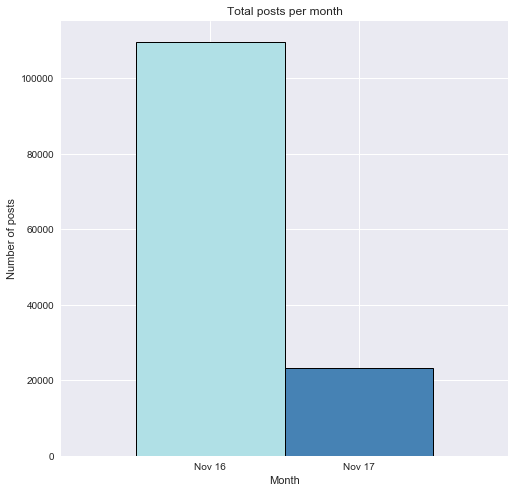

In [17]:
comparison_plot(posts_in_16, posts_in_17,'Number of posts', 'Total posts per month')

# Post title sentiment distribution

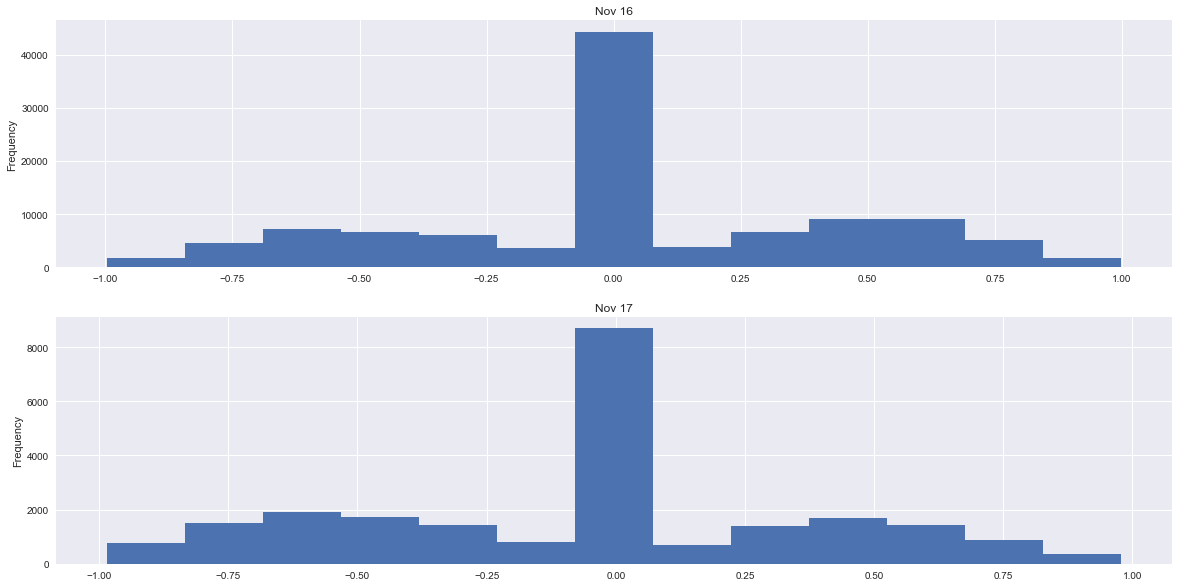

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1)
data16['T_compound'].plot(kind='hist', bins=13, figsize=(20,10), title = 'Nov 16', ax=axes[0]);
data17['T_compound'].plot(kind='hist', bins=13, figsize=(20,10), title = 'Nov 17', ax=axes[1]);

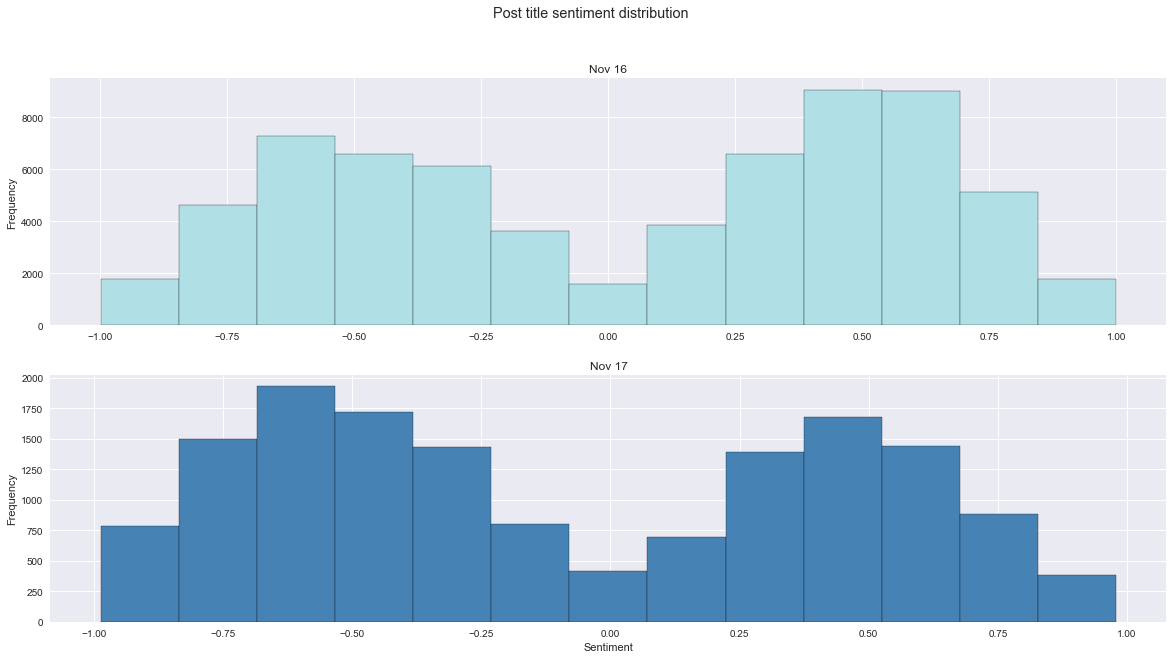

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1)
data16['T_compound'][data16['T_compound'] != 0].plot(kind='hist', bins=13, figsize=(20,10), title = 'Nov 16', ax=axes[0], color='powderblue', edgecolor='black')
data17['T_compound'][data17['T_compound'] != 0].plot(kind='hist', bins=13, figsize=(20,10), title = 'Nov 17', ax=axes[1], color='steelblue', edgecolor='black')
plt.suptitle('Post title sentiment distribution')
axes[1].set_xlabel('Sentiment');

#### Post title sentiments 16

In [20]:
sent_16_mean = data16['T_compound'].mean()
sent_16_mean

0.025366496527333422

In [21]:
sent_16_std = data16['T_compound'].std()
sent_16_std

0.4207231175042343

#### Post title sentiments 17

In [22]:
sent_17_mean = data17['T_compound'].mean()
sent_17_mean

-0.05341539351355966

In [23]:
sent_17_std = data17['T_compound'].std()
sent_17_std

0.43670500717945415

In [24]:
comb = pd.concat([data16, data17])
comb['year'] = comb['created_utc'].apply(lambda x: x.year)

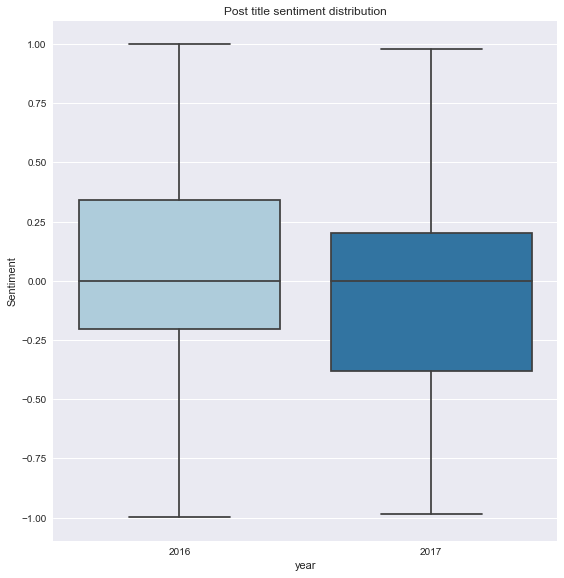

In [25]:
s = sns.factorplot(kind='box', y='T_compound', x='year', data=comb, size=8, aspect=1, palette="Paired")
s.set(title=('Post title sentiment distribution'), ylabel='Sentiment');

# Self text distribution

In [26]:
data16[data16['ST_compound'] == 0]['T_pos'].count() / data16.shape[0]

0.65684415844832933

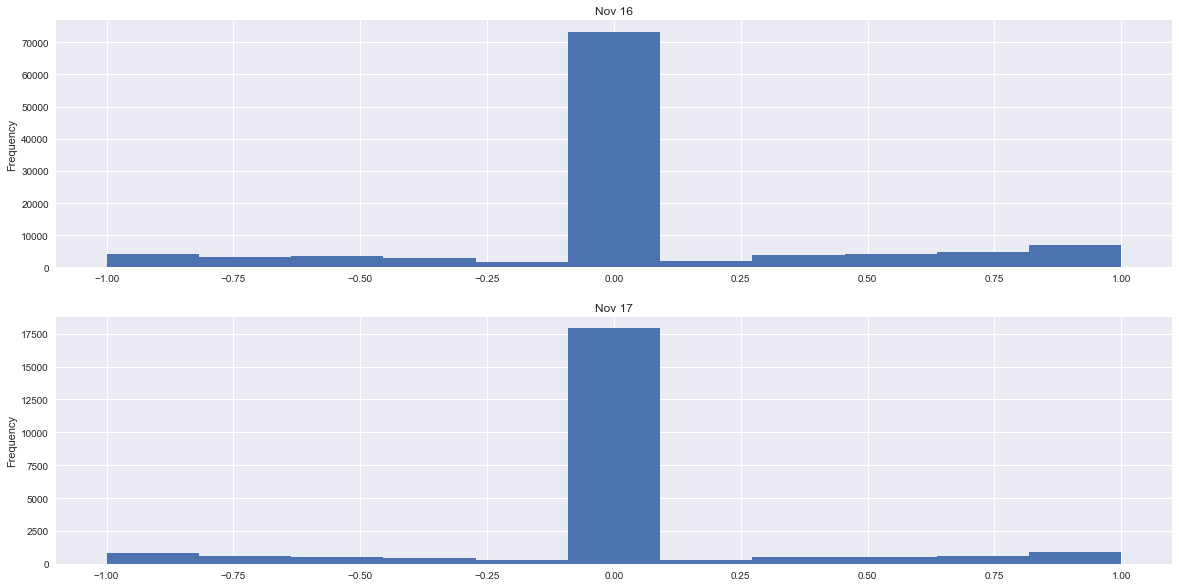

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1)
data16['ST_compound'].plot(kind='hist', bins=11, figsize=(20,10), title = 'Nov 16', ax=axes[0]);
data17['ST_compound'].plot(kind='hist', bins=11, figsize=(20,10), title = 'Nov 17', ax=axes[1]);

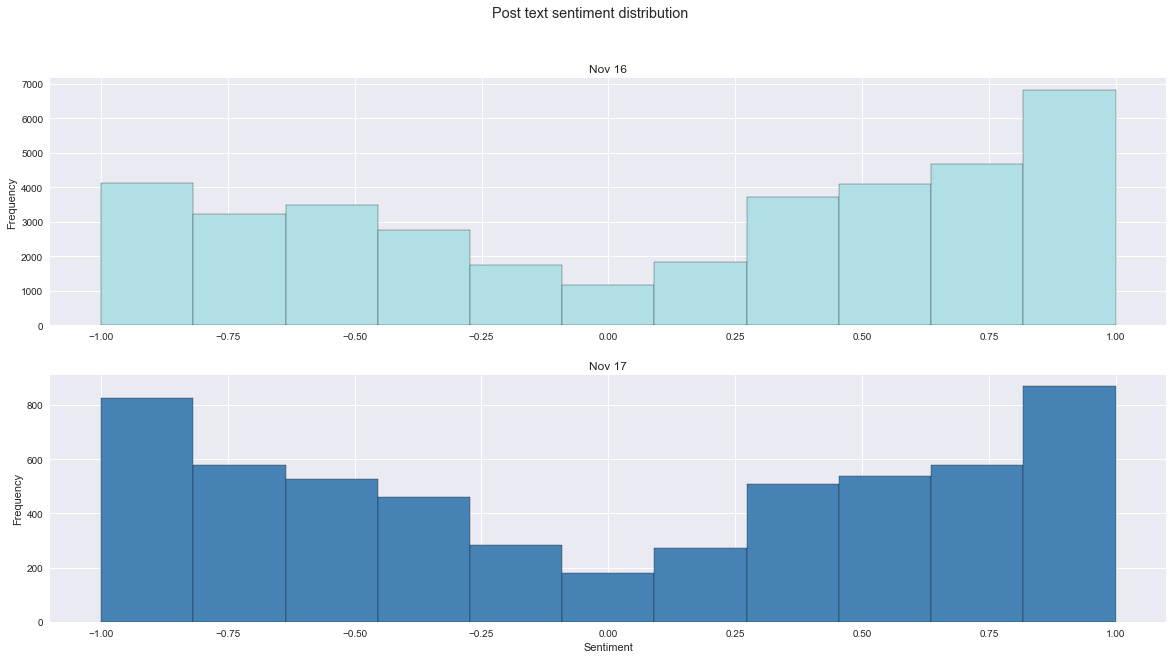

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=1)
data16[data16['ST_compound'] != 0]['ST_compound'].plot(kind='hist', bins=11, figsize=(20,10), title = 'Nov 16', ax=axes[0], color='powderblue', edgecolor='black')
data17[data17['ST_compound'] != 0]['ST_compound'].plot(kind='hist', bins=11, figsize=(20,10), title = 'Nov 17', ax=axes[1], color='steelblue', edgecolor='black')
plt.suptitle('Post text sentiment distribution')
axes[1].set_xlabel('Sentiment');

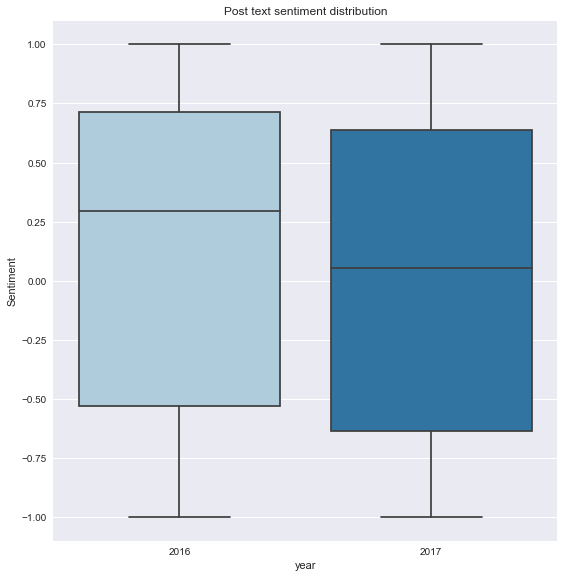

In [29]:
s = sns.factorplot(kind='box', y='ST_compound', x='year', data=comb[comb['ST_compound']!=0], size=8, aspect=1, palette="Paired")
s.set(title=('Post text sentiment distribution'), ylabel='Sentiment');

# Title score vs sentiment

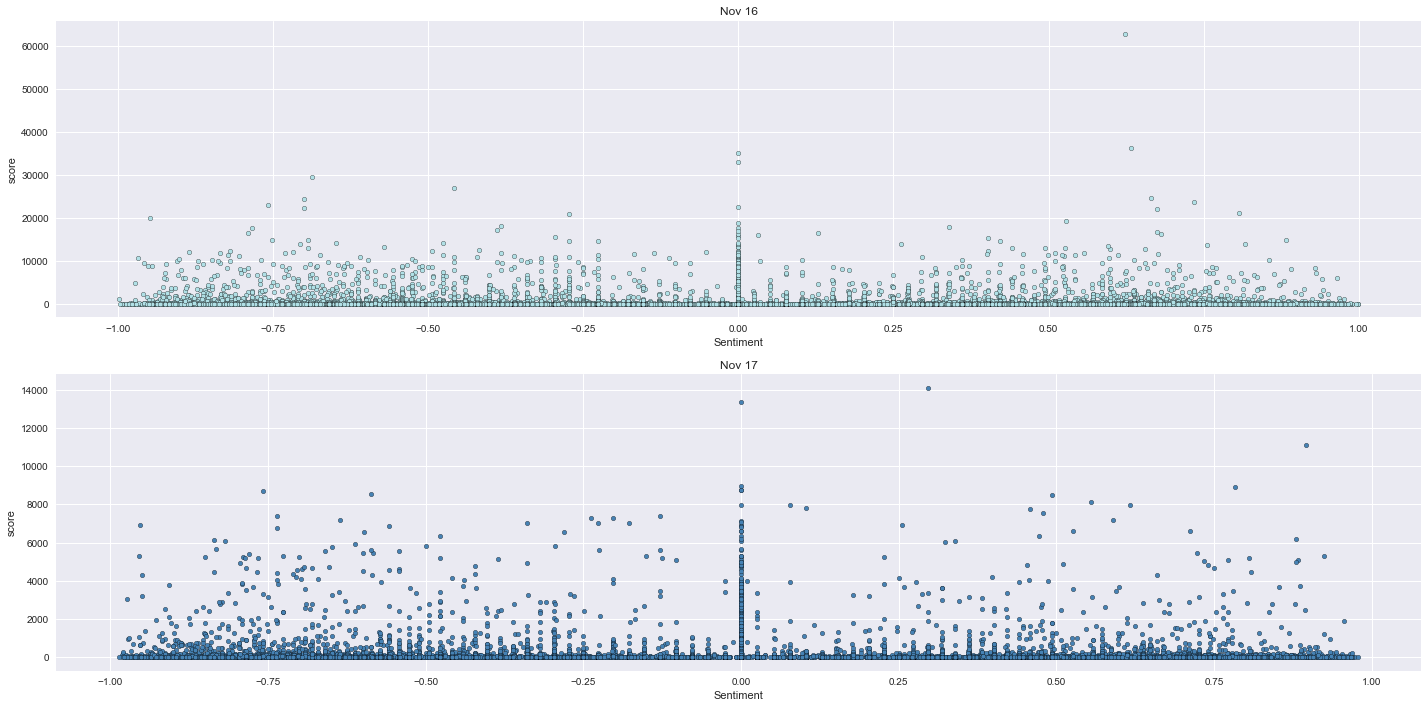

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=1)
data16.plot(kind='scatter', y='score',x='T_compound', figsize=(20,10), title='Nov 16', ax=axes[0], color='powderblue', edgecolor='black')
data17.plot(kind='scatter', y='score',x='T_compound', figsize=(20,10), title='Nov 17', ax=axes[1], color='steelblue', edgecolor='black');
axes[0].set_xlabel('Sentiment')
axes[1].set_xlabel('Sentiment')
fig.tight_layout()

In [126]:
np.corrcoef(data17['T_compound'].apply(lambda x: abs(x)), data17['score'])

array([[ 1.        ,  0.04056855],
       [ 0.04056855,  1.        ]])

# Self text score vs sentiment

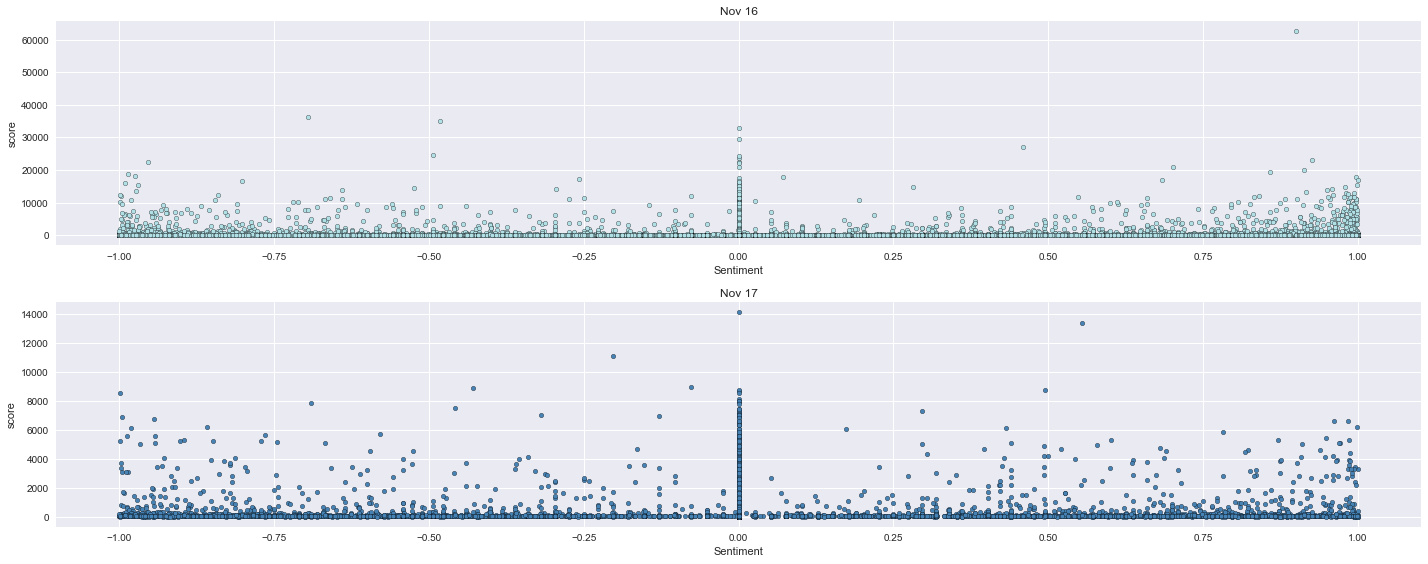

In [121]:
fig, axes = plt.subplots(nrows=2, ncols=1)
data16.plot(kind='scatter', y='score',x='ST_compound', figsize=(20,8), title='Nov 16', ax=axes[0], color='powderblue', edgecolor='black')
data17.plot(kind='scatter', y='score',x='ST_compound', figsize=(20,8), title='Nov 17', ax=axes[1], color='steelblue', edgecolor='black');
axes[0].set_xlabel('Sentiment')
axes[1].set_xlabel('Sentiment')
fig.tight_layout()

In [32]:
comb['daymonth'] = comb['created_utc'].apply(lambda x: x.strftime('%m/%d/00'))
comb['daymonth'] = pd.to_datetime(comb['daymonth'])
comp16 = comb.groupby(['year','daymonth'])['T_compound'].mean()[2016]
comp17 = comb.groupby(['year','daymonth'])['T_compound'].mean()[2017]
comp16 = pd.DataFrame(comp16)
comp16.columns = ['Nov 16']
comp17 = pd.DataFrame(comp17)
comp17.columns = ['Nov 17']
sents = comp16.join(comp17)

In [33]:
my_cmap = ListedColormap(sns.color_palette('Paired', 2))

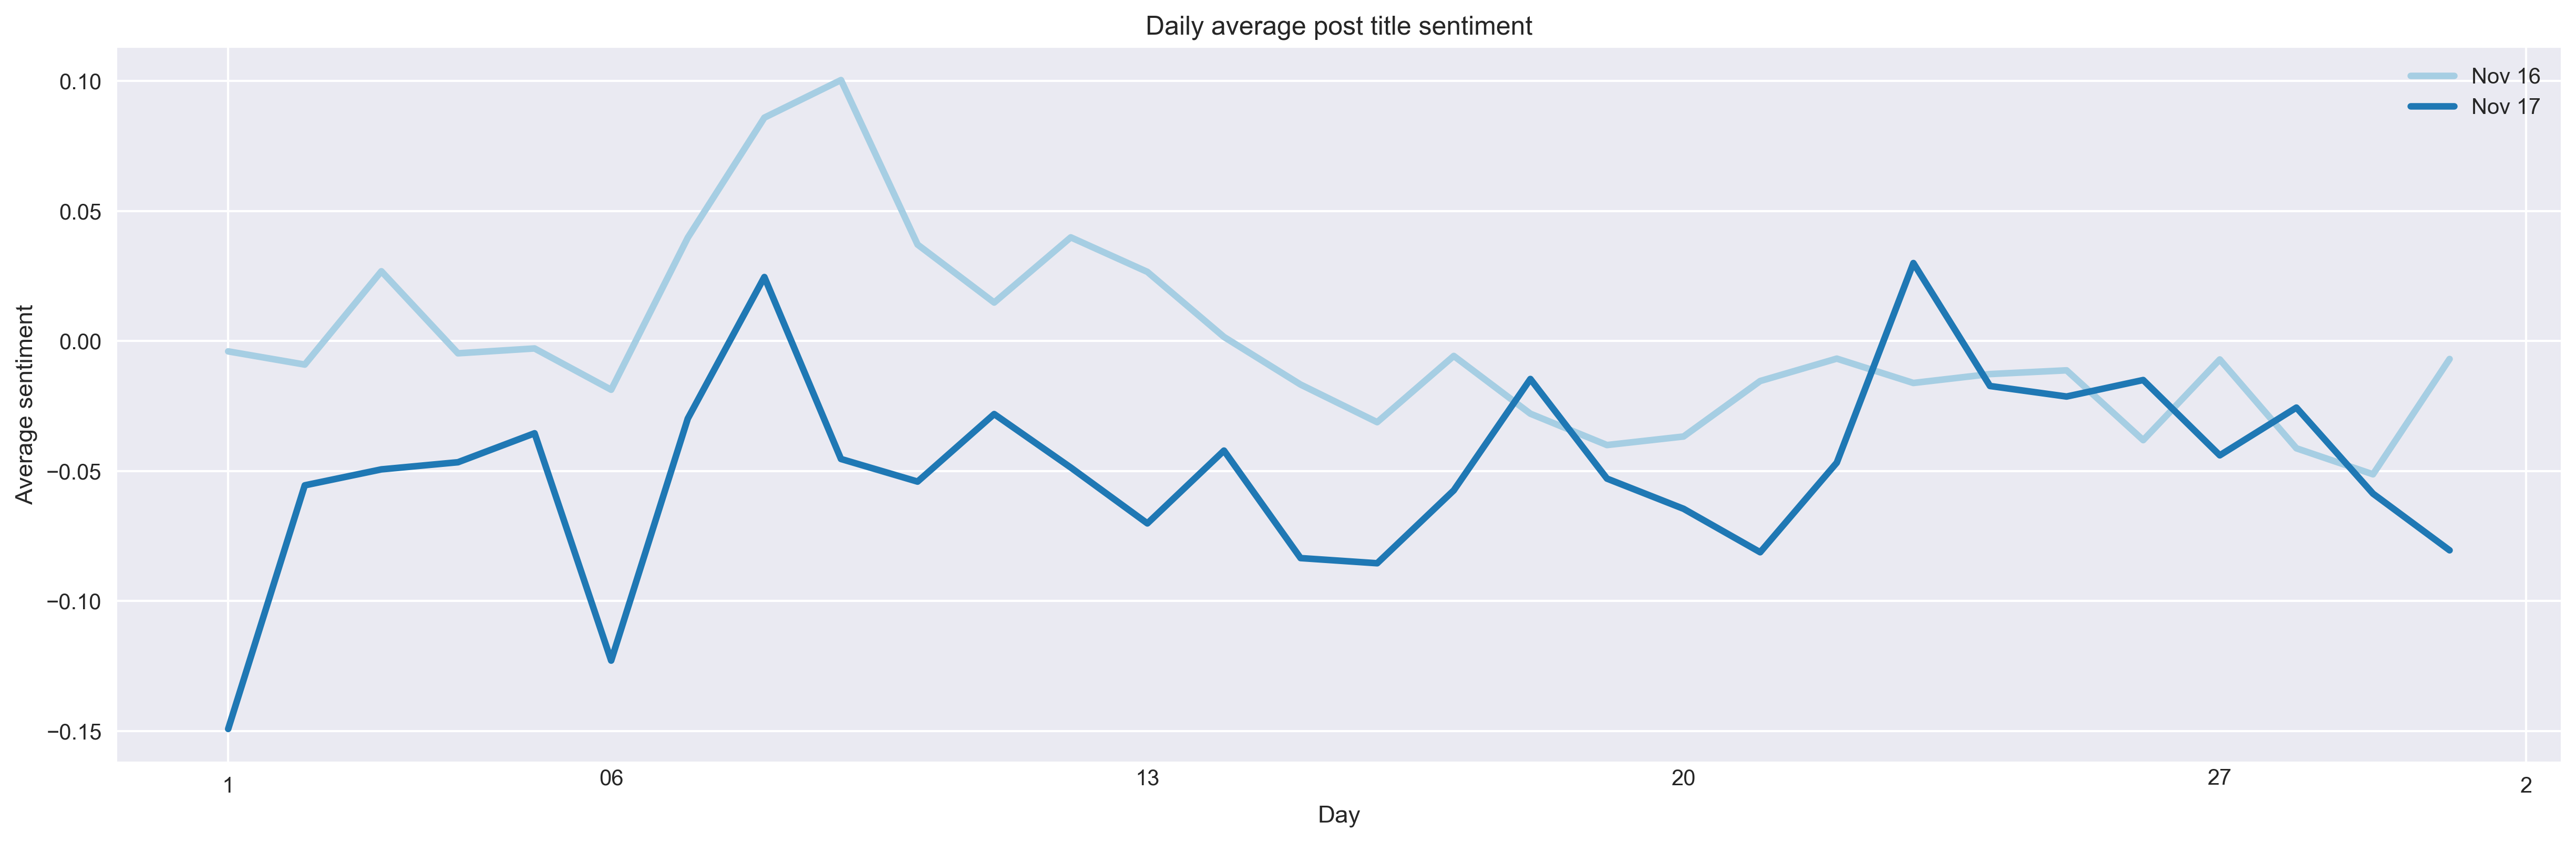

In [45]:
fig, axes = plt.subplots()
sents.plot(figsize=(20,6), ax=axes, colormap=my_cmap, linewidth=3)
axes.set_ylabel('Average sentiment')
axes.set_xlabel('Day')
axes.set_title('Daily average post title sentiment')
axes.set_xticklabels(range(0,31));

In [36]:
comp16ST = comb.groupby(['year','daymonth'])['ST_compound'].mean()[2016]
comp17ST = comb.groupby(['year','daymonth'])['ST_compound'].mean()[2017]
comp16ST = pd.DataFrame(comp16ST)
comp16ST.columns = ['Nov 16']
comp17ST = pd.DataFrame(comp17ST)
comp17ST.columns = ['Nov 17']
sentsST = comp16ST.join(comp17ST)

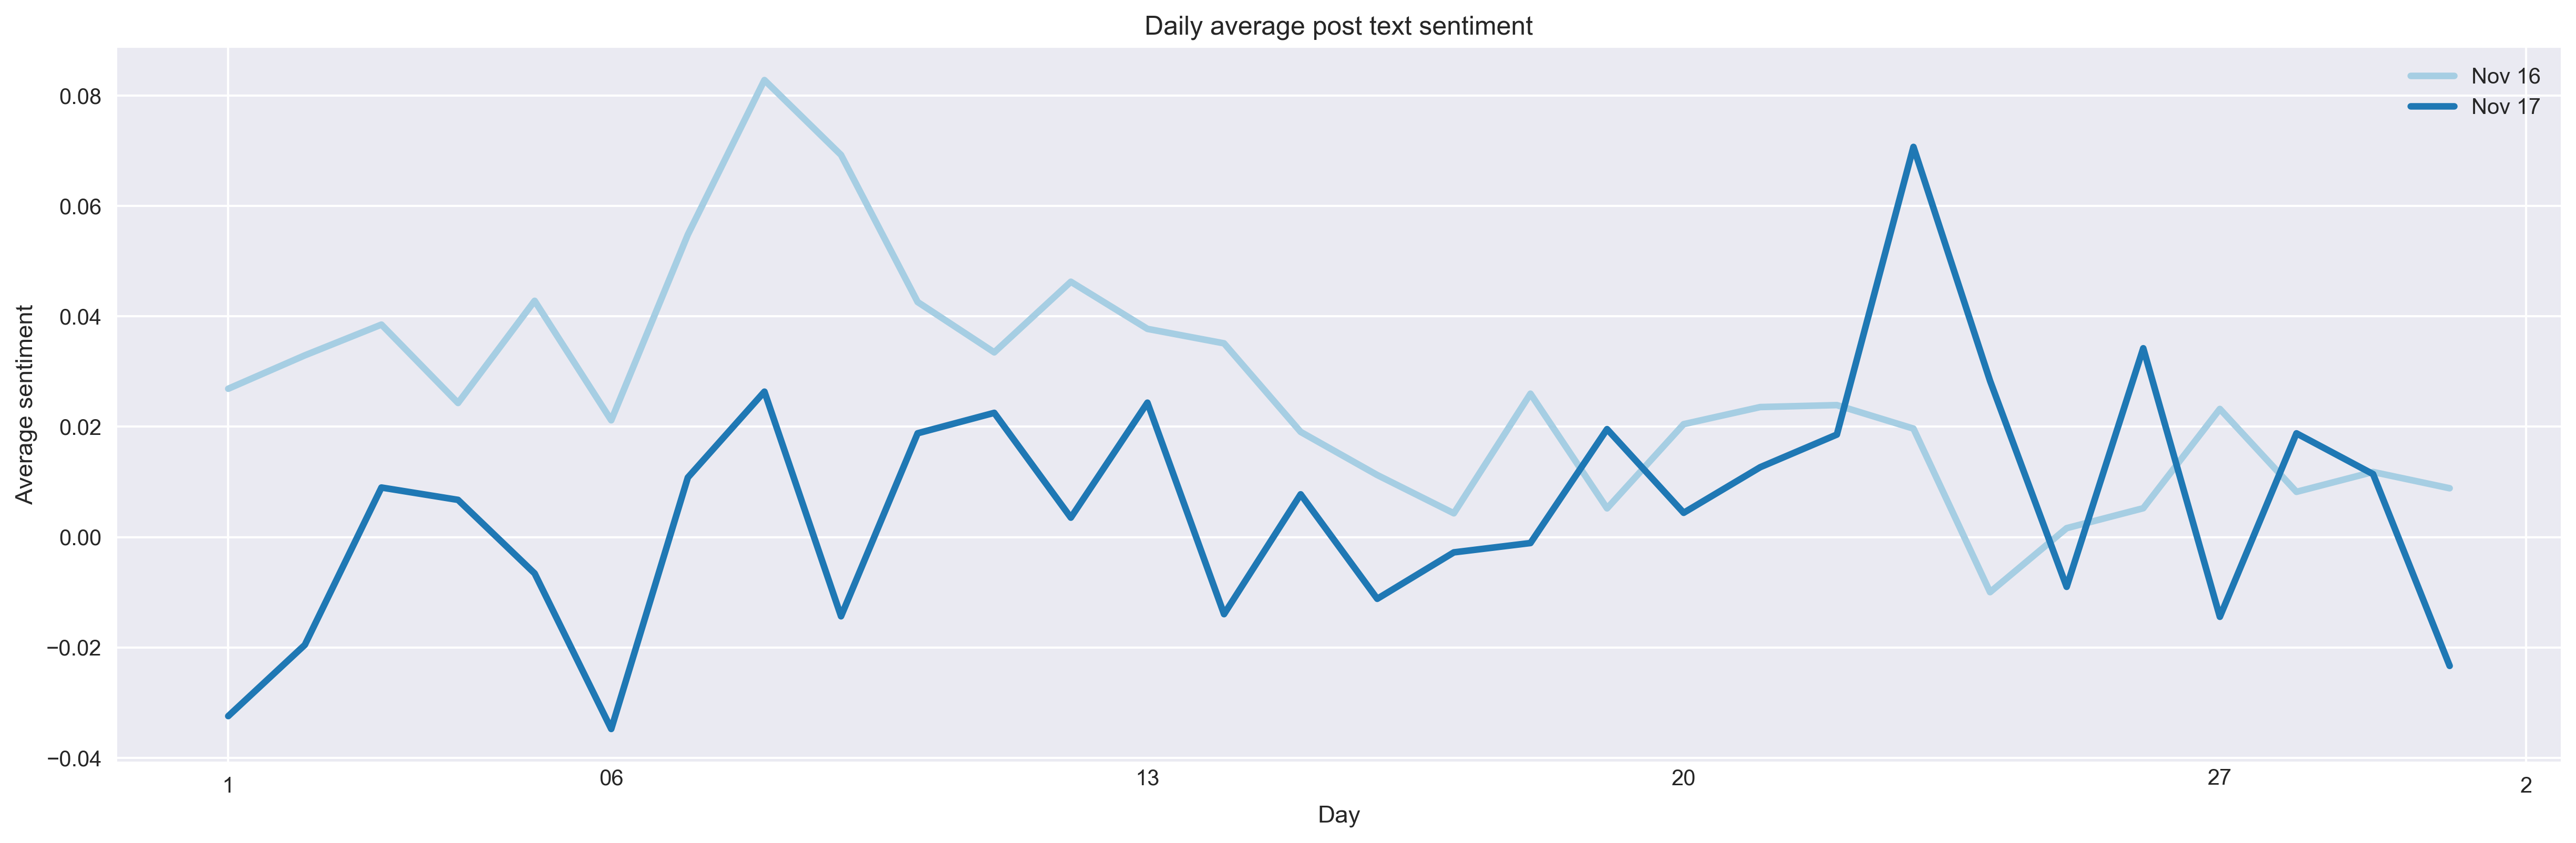

In [46]:
fig, axes = plt.subplots()
sentsST.plot(figsize=(20,6), ax=axes,colormap=my_cmap, linewidth=3)
axes.set_ylabel('Average sentiment')
axes.set_xlabel('Day')
axes.set_title('Daily average post text sentiment')
axes.set_xticklabels(range(0,31));

In [38]:
comp16C = comb.groupby(['year','daymonth'])['ST_compound'].count()[2016]
comp17C = comb.groupby(['year','daymonth'])['ST_compound'].count()[2017]
comp16C = pd.DataFrame(comp16C)
comp16C.columns = ['Nov 16']
comp17C = pd.DataFrame(comp17C)
comp17C.columns = ['Nov 17']
sentsC = comp16C.join(comp17C)

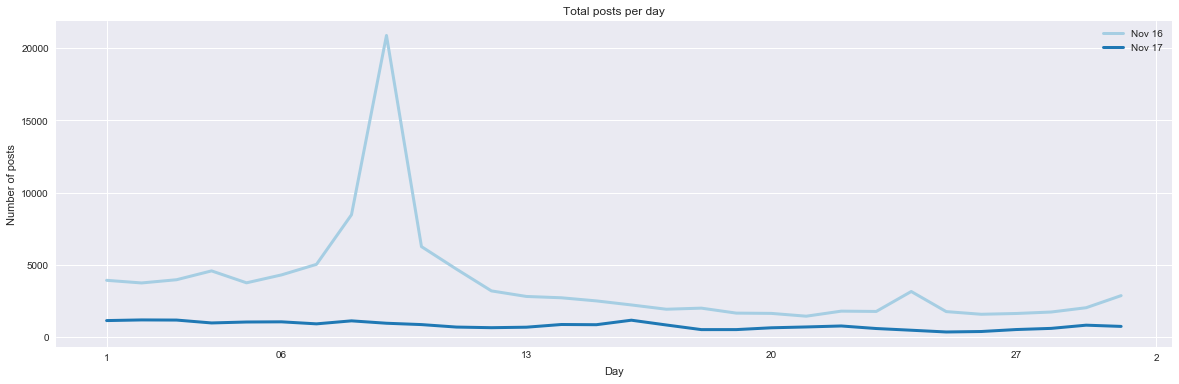

In [48]:
fig, axes = plt.subplots()
sentsC.plot(figsize=(20,6), ax=axes, colormap=my_cmap, linewidth=3)
axes.set_ylabel('Number of posts')
axes.set_xlabel('Day')
axes.set_title('Total posts per day')
axes.set_xticklabels(range(0,31));